In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("c:/Users/REVAN/Downloads/electric vehicle in US/Electric_Vehicle_Population_Size_History_By_County_.csv")

In [3]:
df.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19


In [4]:
df.isnull().sum()

Date                                         0
County                                      86
State                                       86
Vehicle Primary Use                          0
Battery Electric Vehicles (BEVs)             0
Plug-In Hybrid Electric Vehicles (PHEVs)     0
Electric Vehicle (EV) Total                  0
Non-Electric Vehicle Total                   0
Total Vehicles                               0
Percent Electric Vehicles                    0
dtype: int64

In [5]:
DS = df.drop(columns=['Date', 'County', 'State', 'Vehicle Primary Use'])
DS.head()

,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,7,0,7,460,467,1.50
1,1,2,3,188,191,1.57
2,0,1,1,32,33,3.03
3,0,0,0,"3,575","3,575",0.00
4,0,1,1,83,84,1.19


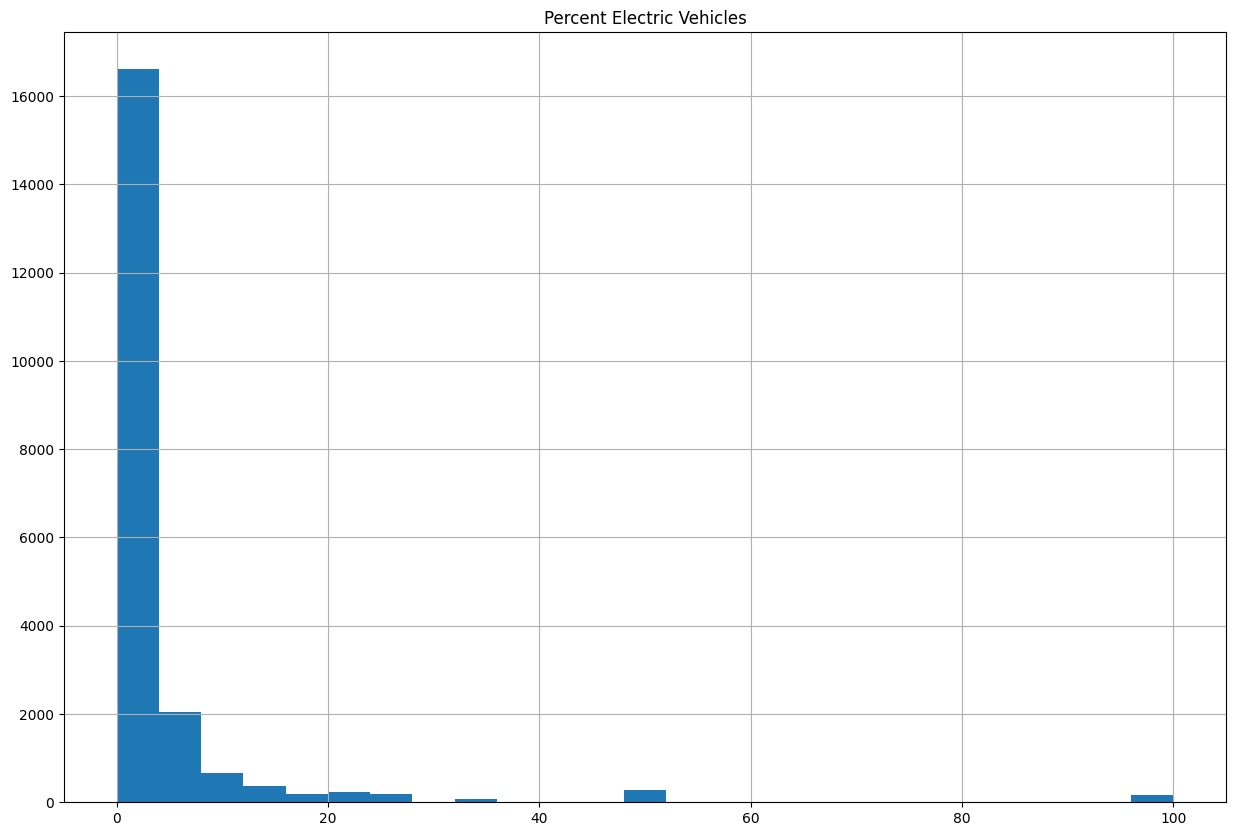

In [6]:
DS.hist(bins=25, figsize=(15, 10))
plt.show()

In [7]:
Label_encoder = LabelEncoder()

DS['Battery Electric Vehicles (BEVs)'] = Label_encoder.fit_transform(DS['Battery Electric Vehicles (BEVs)'])
DS['Plug-In Hybrid Electric Vehicles (PHEVs)'] = Label_encoder.fit_transform(DS['Plug-In Hybrid Electric Vehicles (PHEVs)'])
#DS['Electric Vehicle (EV) Total'] = Label_encoder.fit_transform(DS['Electric Vehicle (EV) Total'])
DS['Non-Electric Vehicle Total'] = Label_encoder.fit_transform(DS['Non-Electric Vehicle Total'])
DS['Total Vehicles'] = Label_encoder.fit_transform(DS['Total Vehicles'])
DS['Percent Electric Vehicles'] = Label_encoder.fit_transform(DS['Percent Electric Vehicles'])

In [8]:
x = DS.drop(columns = ['Electric Vehicle (EV) Total'])
y = DS['Electric Vehicle (EV) Total']

In [9]:
x_training, x_testing, y_training, y_testing = train_test_split(x, y, test_size= 0.5, random_state = 82)

In [10]:
skala = StandardScaler()
#x_training = skala.fit_transform(x_training)
#x_testing = skala.transform(x_testing)
data_transform = skala.fit_transform(x_training.to_numpy())  
data_transform = pd.DataFrame(data_transform, columns = x.columns)
data_transform

,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,-0.613528,-0.512202,-0.832313,-0.875288,-1.035239
1,-0.610419,-0.512202,-1.660688,-1.691647,2.036673
2,0.023681,2.360315,-0.086115,-0.110518,-0.756986
3,-0.610419,-0.512202,1.495070,1.507870,-0.367432
4,-0.613528,-0.512202,1.688231,1.695599,-1.035239
...,...,...,...,...,...
10404,-0.610419,-0.512202,0.439530,0.444549,0.172378
10405,-0.613528,0.874685,0.676613,0.670015,-0.812637
10406,-0.610419,-0.512202,-0.433711,-0.409070,1.179654
10407,-0.613528,-0.507714,-1.660215,-0.721952,2.031108


In [11]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_training, y_training)

KNeighborsClassifier(n_neighbors=3)

In [12]:
y_predict = KNN.predict(x_testing)
accuracy = accuracy_score(y_testing, y_predict)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_testing, y_predict, average='weighted')  
print(f"Precision: {precision}")
recall = recall_score(y_testing, y_predict, average='weighted') 
print(f"Recall: {recall}") 
f1 = f1_score(y_testing, y_predict, average='weighted')
print(f"F1-score: {f1}")

Accuracy: 0.7711815561959654
Precision: 0.7724246820008573


c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Recall: 0.7711815561959654
F1-score: 0.7709395244669791


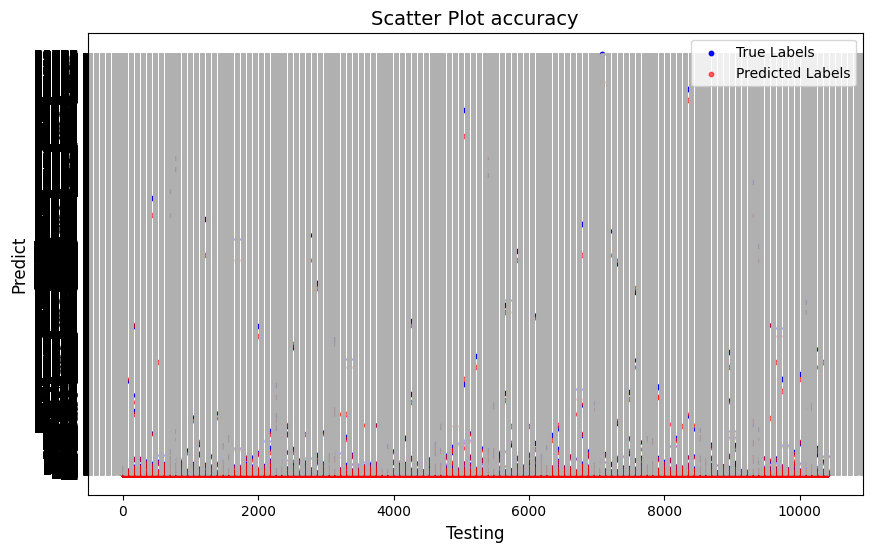

In [13]:
y_testing_cleaned = [int(str(label).replace(',', '')) for label in y_testing]
y_predict_cleaned = [int(str(label).replace(',', '')) for label in y_predict]

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_testing_cleaned)), y_testing_cleaned, color='blue', label='True Labels', s=10)
plt.scatter(range(len(y_predict_cleaned)), y_predict_cleaned, color='red', alpha=0.6, label='Predicted Labels', s=10)

plt.xlabel('Testing', fontsize=12)
plt.ylabel('Predict', fontsize=12)
plt.title('Scatter Plot accuracy', fontsize=14)
plt.legend(loc='upper right')
plt.yticks(range(min(min(y_testing_cleaned), min(y_predict_cleaned)), 
                 max(max(y_testing_cleaned), max(y_predict_cleaned)) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()
